STOCK PRICE PREDICTION

AIM:

The aim is to create a model to get the prediction of the "New York Stock Exchange" 
Here we have the value of 2016 whole year, 80% of the value will be used to train the model, and the remaining 20% test the model.

Dataset consists of the following files:
prices.csv: raw, as-is daily prices. Most of the data spans from 2010 to the end of 2016, for companies new on the stock market date range, is shorter. There have been approx. 140 stock splits in that time, this set doesn't account for that.
prices-split-adjusted.csv: same as prices, but there have been added adjustments for splits.
securities.csv: a general description of each company with the division on sectors
fundamentals.csv: metrics extracted from annual SEC 10K fillings (2012-2016), should be enough to derive most of the popular fundamental indicators


In [1]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
import math
from keras.models import Sequential 
from keras.layers import Dense , BatchNormalization , Dropout , Activation 
from keras.layers import LSTM , GRU 
#from keras.optimizers import Adam , SGD , RMSprop
from tensorflow.keras.optimizers import Adam,SGD , RMSprop
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint

In [2]:
os.chdir('D:\\top mentor assignment\\Batch 98 Day 51\\PRJ Stock Price Prediction\\')

In [3]:
os.getcwd()

'D:\\top mentor assignment\\Batch 98 Day 51\\PRJ Stock Price Prediction'

In [4]:
df =pd.read_csv("prices.csv", header=0)
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [5]:
df.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [6]:
df.symbol.value_counts()

symbol
KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: count, Length: 501, dtype: int64

In [7]:
df.symbol.unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [8]:
df.symbol.unique().shape

(501,)

In [9]:
df.symbol.unique()[0:20]

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN'], dtype=object)

In [10]:
len(df.symbol.values)

851264

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [12]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [13]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [14]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [15]:
pd.DataFrame(df.date.unique())

,0
0,2016-01-05 00:00:00
1,2016-01-06 00:00:00
2,2016-01-07 00:00:00
3,2016-01-08 00:00:00
4,2016-01-11 00:00:00
...,...
3519,2016-12-23
3520,2016-12-27
3521,2016-12-28
3522,2016-12-29


In [16]:
df.duplicated().sum()

0

In [17]:
sec_info = pd.read_csv('securities.csv')
sec_info.head()


,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",31-03-1964,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31-12-2012,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",31-08-2015,718877


In [18]:
sec_info["Ticker symbol"].nunique()

505

In [19]:
sec_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB


In [20]:
sec_info.isnull().sum()


Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64

In [21]:
sec_info.describe()

,CIK
count,5.050000e+02
mean,7.074490e+05
std,5.144375e+05
min,1.800000e+03
25%,8.631200e+04
50%,8.310010e+05
75%,1.075531e+06
max,1.659166e+06


In [22]:
sec_info.loc[sec_info.Security.str.startswith('Yaho') , :]  

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
500,YHOO,Yahoo Inc.,reports,Information Technology,Internet Software & Services,"Sunnyvale, California",NaN,1011006


In [23]:
sec_info.loc[sec_info.Security.str.startswith('Xero') , :]

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
496,XRX,Xerox Corp.,reports,Information Technology,IT Consulting & Other Services,"Norwalk, Connecticut",NaN,108772


In [24]:
sec_info.loc[sec_info.Security.str.startswith('Microsoft') , :]

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
306,MSFT,Microsoft Corp.,reports,Information Technology,Systems Software,"Redmond, Washington",01-06-1994,789019


In [25]:
sec_info.loc[sec_info.Security.str.startswith('Face') , :]

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
181,FB,Facebook,reports,Information Technology,Internet Software & Services,"Menlo Park, California",23-12-2013,1326801


In [26]:
sec_info.loc[sec_info.Security.str.startswith('Adobe') , :]

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
6,ADBE,Adobe Systems Inc,reports,Information Technology,Application Software,"San Jose, California",05-05-1997,796343


In [27]:
sec_info.loc[sec_info.Security.str.startswith('Gold') , :]

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
212,GS,Goldman Sachs Group,reports,Financials,Investment Banking & Brokerage,"New York, New York",NaN,886982


In [28]:
sec_plot = sec_info.loc[(sec_info["Security"] == 'Yahoo Inc.') | (sec_info["Security"] == 'Xerox Corp.') | (sec_info["Security"] == 'Adobe Systems Inc')
              | (sec_info["Security"] == 'Microsoft Corp.') | (sec_info["Security"] == 'Adobe Systems Inc') 
              | (sec_info["Security"] == 'Facebook') | (sec_info["Security"] == 'Goldman Sachs Group') , ["Ticker symbol"] ]["Ticker symbol"] 

In [29]:
sec_plot

6      ADBE
181      FB
212      GS
306    MSFT
496     XRX
500    YHOO
Name: Ticker symbol, dtype: object

In [30]:
for i in sec_plot:
    print (i)

ADBE
FB
GS
MSFT
XRX
YHOO


In [31]:
def plotter(code):
    global closing_stock ,opening_stock
    f, axs = plt.subplots(2,2,figsize=(15,8))
    plt.subplot(212)
    company = df[df['symbol']==code]
    company = company.open.values.astype('float32')
    company = company.reshape(-1, 1)
    opening_stock = company
    plt.xlabel('Time')
    plt.ylabel(code + " open stock prices") 
    plt.title('prices Vs Time')
    plt.plot(company , 'g')
    plt.subplot(211)
    company_close = df[df['symbol']==code]
    company_close = company_close.close.values.astype('float32')
    company_close = company_close.reshape(-1, 1)
    closing_stock = company_close
    plt.xlabel('Time')
    plt.ylabel(code + " close stock prices")
    plt.title('prices Vs Time')
    plt.grid(True)
    plt.plot(company_close , 'b')
    plt.show()

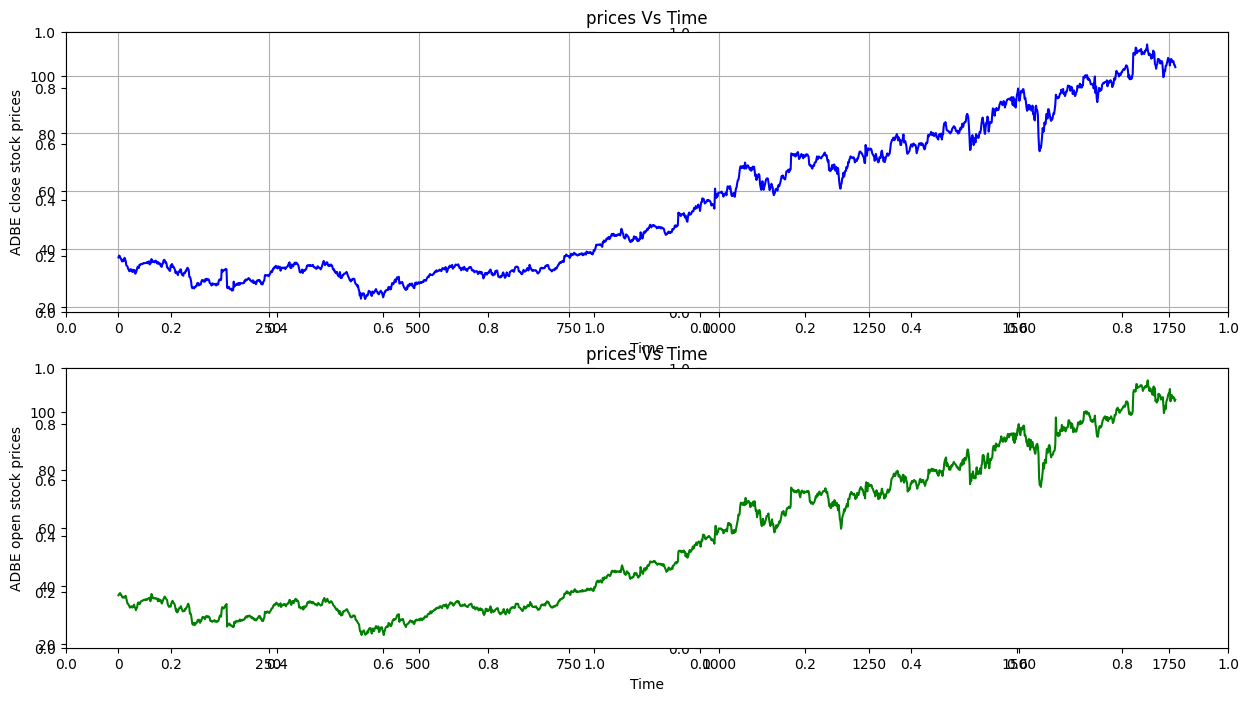

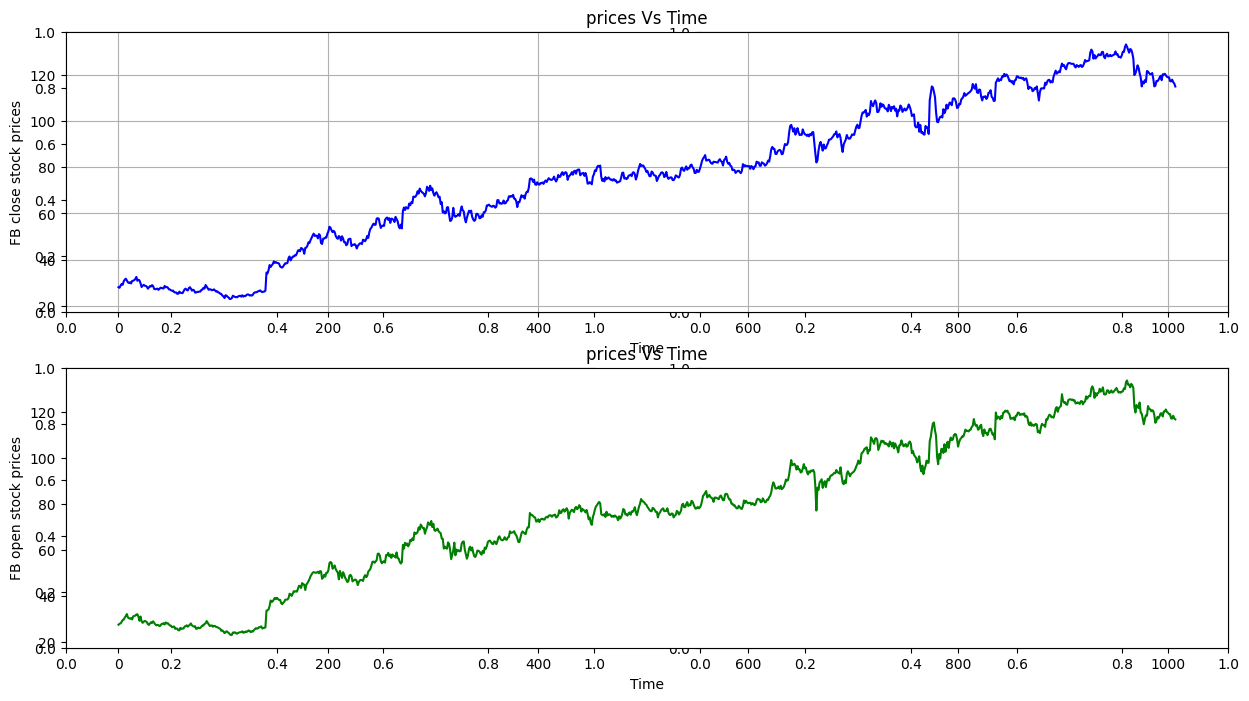

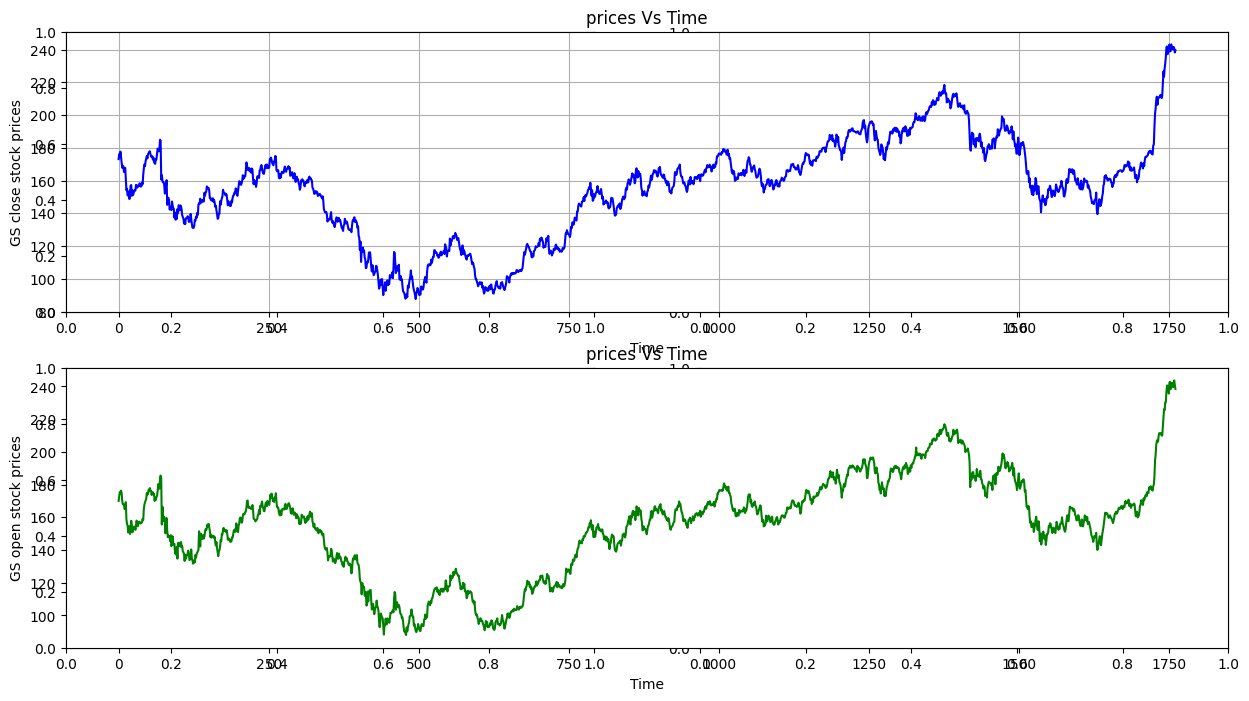

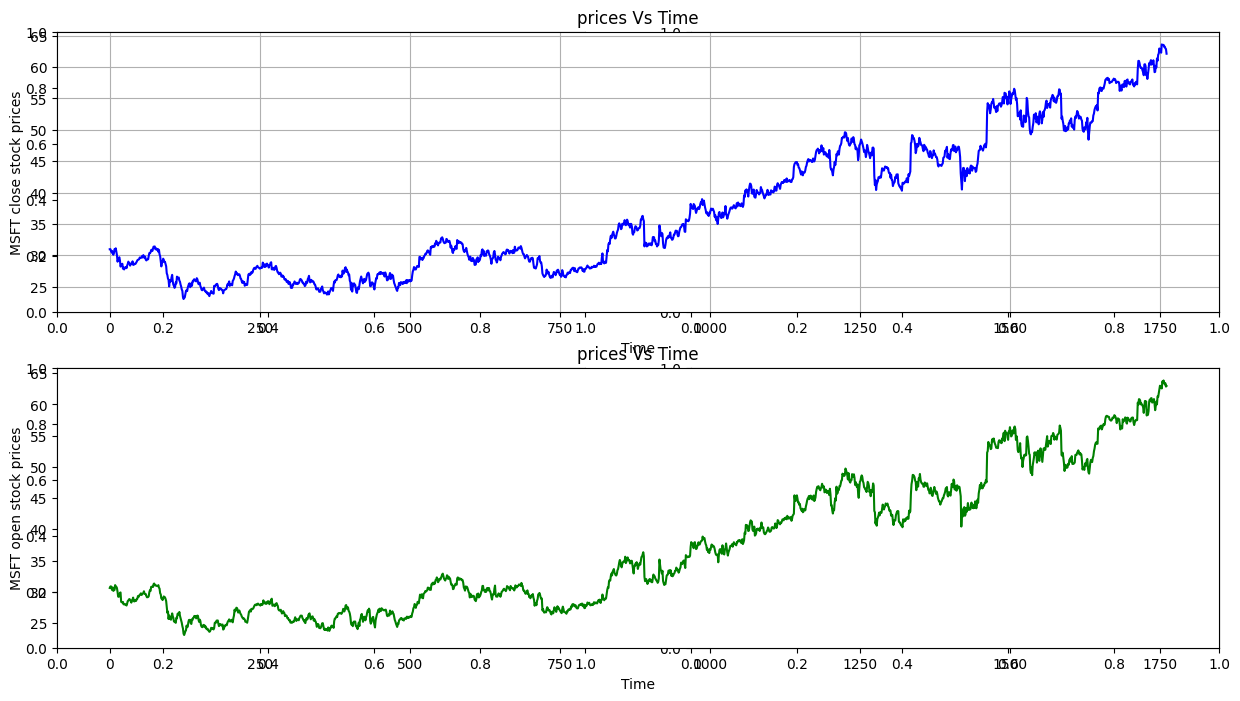

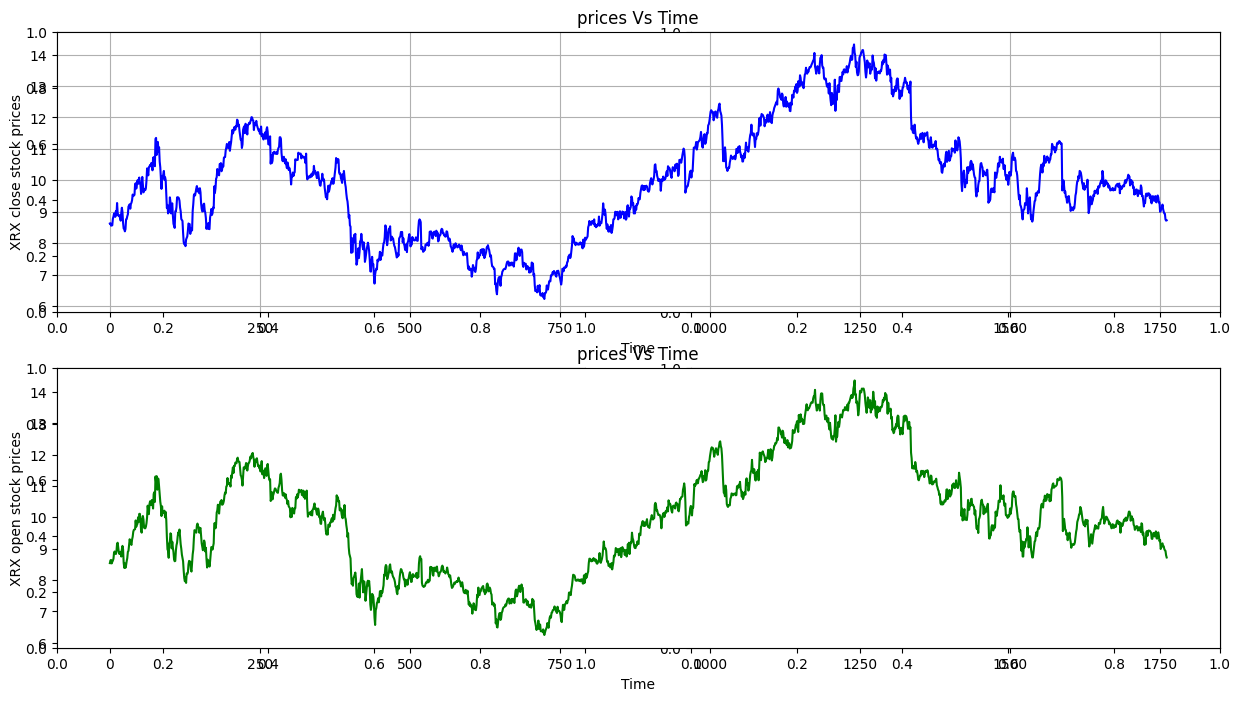

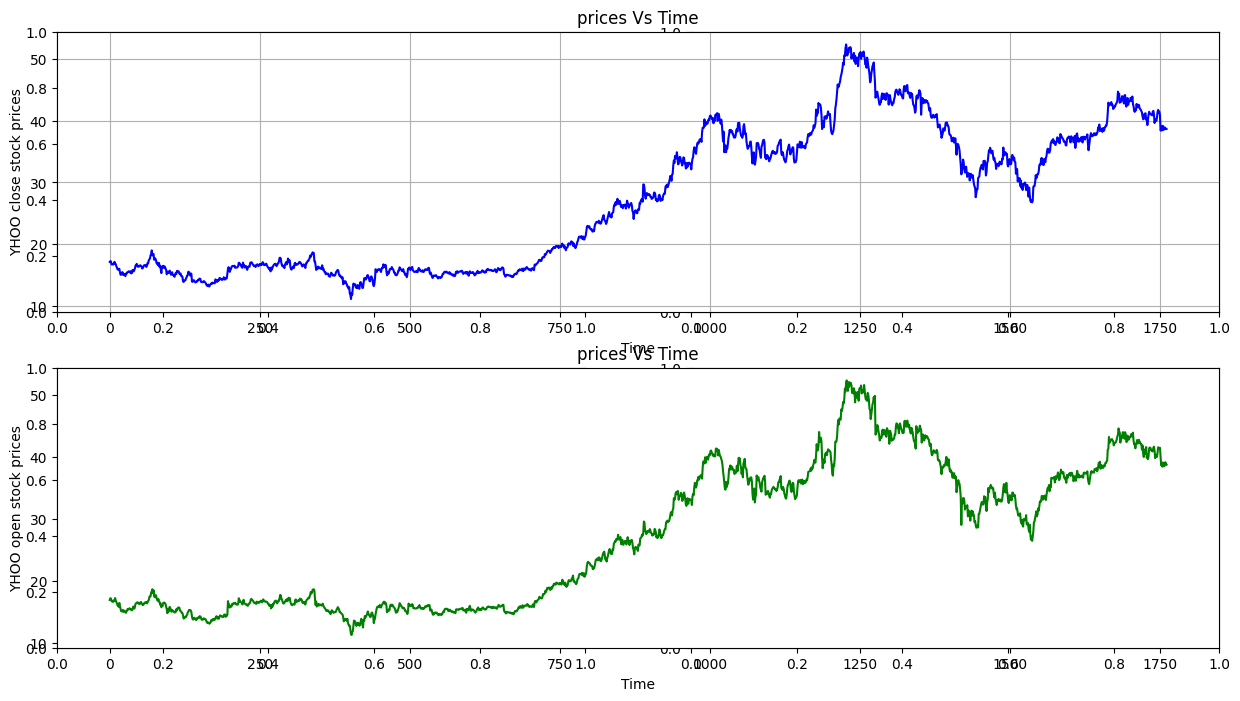

In [32]:
for i in sec_plot:
    plotter(i)

In [33]:
stocks= np.array (df[df.symbol.isin (['YHOO'])].close)
print(stocks)

[17.1      17.23     17.17     ... 38.73     38.639999 38.669998]


In [34]:
stocks.shape

(1762,)

In [35]:
stocks = stocks.reshape(len(stocks) , 1)

In [36]:
stocks.shape

(1762, 1)

In [37]:
print(stocks)

[[17.1     ]
 [17.23    ]
 [17.17    ]
 ...
 [38.73    ]
 [38.639999]
 [38.669998]]


In [38]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
stocks = scaler.fit_transform(stocks) 
print(stocks)

[[0.14559109]
 [0.14874031]
 [0.14728683]
 ...
 [0.66957366]
 [0.6673934 ]
 [0.66812012]]


In [39]:
stocks.shape

(1762, 1)

In [40]:
train = int(len(stocks) * 0.80)
print (train)

1409


In [41]:
test = len(stocks) - train 
print (test)

353


In [42]:
train = stocks[0:train]
display (train.shape)
print(train)

(1409, 1)

[[0.14559109]
 [0.14874031]
 [0.14728683]
 ...
 [0.63372095]
 [0.61458332]
 [0.61967051]]


In [44]:
test = stocks[len(train) : ]
display(test.shape)
print(test)

(353, 1)

[[0.63129851]
 [0.60416666]
 [0.56686053]
 [0.6017442 ]
 [0.60925394]
 [0.60586237]
 [0.59593022]
 [0.58381782]
 [0.55741276]
 [0.52906978]
 [0.48982557]
 [0.50024226]
 [0.51913761]
 [0.54748061]
 [0.53415697]
 [0.51235471]
 [0.49685079]
 [0.500969  ]
 [0.51962213]
 [0.49636629]
 [0.47989342]
 [0.4949128 ]
 [0.48594962]
 [0.49273257]
 [0.46584303]
 [0.48328492]
 [0.49200583]
 [0.48062017]
 [0.47601745]
 [0.48643412]
 [0.46778102]
 [0.45179265]
 [0.44210272]
 [0.43701549]
 [0.39995156]
 [0.41593993]
 [0.43168606]
 [0.43168606]
 [0.47529068]
 [0.47868218]
 [0.48134689]
 [0.50339151]
 [0.51550386]
 [0.51913761]
 [0.52737407]
 [0.51477714]
 [0.50872094]
 [0.54239342]
 [0.53972867]
 [0.54287792]
 [0.52664735]
 [0.4852229 ]
 [0.49854652]
 [0.53488369]
 [0.54045549]
 [0.56225774]
 [0.58381782]
 [0.58042635]
 [0.59423449]
 [0.58575583]
 [0.57243221]
 [0.58091087]
 [0.58212208]
 [0.55983531]
 [0.54723839]
 [0.55474812]
 [0.53997097]
 [0.53633722]
 [0.5111434 ]
 [0.5295543 ]
 [0.52737407]
 [0.53

In [46]:
def process_data(data , n_features):
    dataX, dataY = [], []
    for i in range(len(data)-n_features):
        a = data[i:(i+n_features), 0]
        dataX.append(a) #putting a in dataX
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)

In [47]:
n_features = 2
trainX, trainY = process_data(train, n_features)
print(trainX.shape , trainY.shape)

(1407, 2) (1407,)


In [48]:
testX, testY = process_data(test, n_features)
print (testX.shape , testY.shape)

(351, 2) (351,)


In [49]:
stocksX, stocksY = process_data(stocks, n_features)
print (stocksX.shape , stocksY.shape)

(1760, 2) (1760,)


In [50]:
display (trainX[:10])

array([[0.14559109, 0.14874031],
       [0.14874031, 0.14728683],
       [0.14728683, 0.13590119],
       [0.13590119, 0.13590119],
       [0.13590119, 0.13687016],
       [0.13687016, 0.13541667],
       [0.13541667, 0.14074613],
       [0.14074613, 0.14607561],
       [0.14607561, 0.13880814],
       [0.13880814, 0.13711241]])

In [51]:
display (trainY[:10])

array([0.14728683, 0.13590119, 0.13590119, 0.13687016, 0.13541667,
       0.14074613, 0.14607561, 0.13880814, 0.13711241, 0.1281492 ])

In [52]:
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
display (trainX.shape)

(1407, 1, 2)

In [53]:
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])
display (testX.shape)

(351, 1, 2)

In [54]:
stocksX= stocksX.reshape(stocksX.shape[0] , 1 ,stocksX.shape[1])
display (stocksX.shape)

(1760, 1, 2)

In [63]:
filepath="stock_weights1.keras"

In [64]:
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_delta =0.0001, patience=1, verbose=1)

In [65]:
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max',)

In [66]:
model = Sequential()

In [67]:
model.add(GRU(256 , input_shape = (1 , n_features) , return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(256))
model.add(Dropout(0.4))
model.add(Dense(64 ,  activation = 'relu'))
model.add(Dense(1))
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 1, 256)              │         199,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 256)                 │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 741,505 (2.83 MB)

 Trainable params: 741,505 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

None


In [69]:
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate = 0.0005) , metrics = ['mean_squared_error'])

In [70]:
history = model.fit(trainX, trainY, epochs=100 , batch_size = 128 , 
          callbacks = [checkpoint , lr_reduce] , validation_data = (testX,testY))    

Epoch 1/100
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1617 - mean_squared_error: 0.1617
Epoch 1: val_loss improved from -inf to 0.16949, saving model to stock_weights1.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 329ms/step - loss: 0.1588 - mean_squared_error: 0.1588 - val_loss: 0.1695 - val_mean_squared_error: 0.1695 - learning_rate: 5.0000e-04
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0608 - mean_squared_error: 0.0608
Epoch 2: val_loss did not improve from 0.16949
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0592 - mean_squared_error: 0.0592 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - learning_rate: 5.0000e-04
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 3: val_loss did not improve from 0.16949

Epoch 3: ReduceLROnPlateau reducing learning rate to 5.0000002374872565e-05.
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0022 - val_mean_squared_err

In [71]:
test_pred = model.predict(testX)
display (test_pred [:10])

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


array([[0.5687012 ],
       [0.5457822 ],
       [0.54332376],
       [0.5591372 ],
       [0.5608581 ],
       [0.5562165 ],
       [0.54835385],
       [0.53487074],
       [0.5153558 ],
       [0.4915394 ]], dtype=float32)

In [72]:
test_pred = scaler.inverse_transform(test_pred)
display (test_pred [:10])

array([[34.565987],
       [33.61989 ],
       [33.518402],
       [34.171185],
       [34.24222 ],
       [34.050613],
       [33.726048],
       [33.169464],
       [32.363888],
       [31.380747]], dtype=float32)

In [73]:
testY = testY.reshape(testY.shape[0] , 1)
testY = scaler.inverse_transform(testY)
display (testY[:10])

array([[34.490002],
       [35.93    ],
       [36.240002],
       [36.099998],
       [35.689999],
       [35.189999],
       [34.099998],
       [32.93    ],
       [31.309999],
       [31.74    ]])

In [74]:
print (r2_score(testY,test_pred))

0.7021674662648728


Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


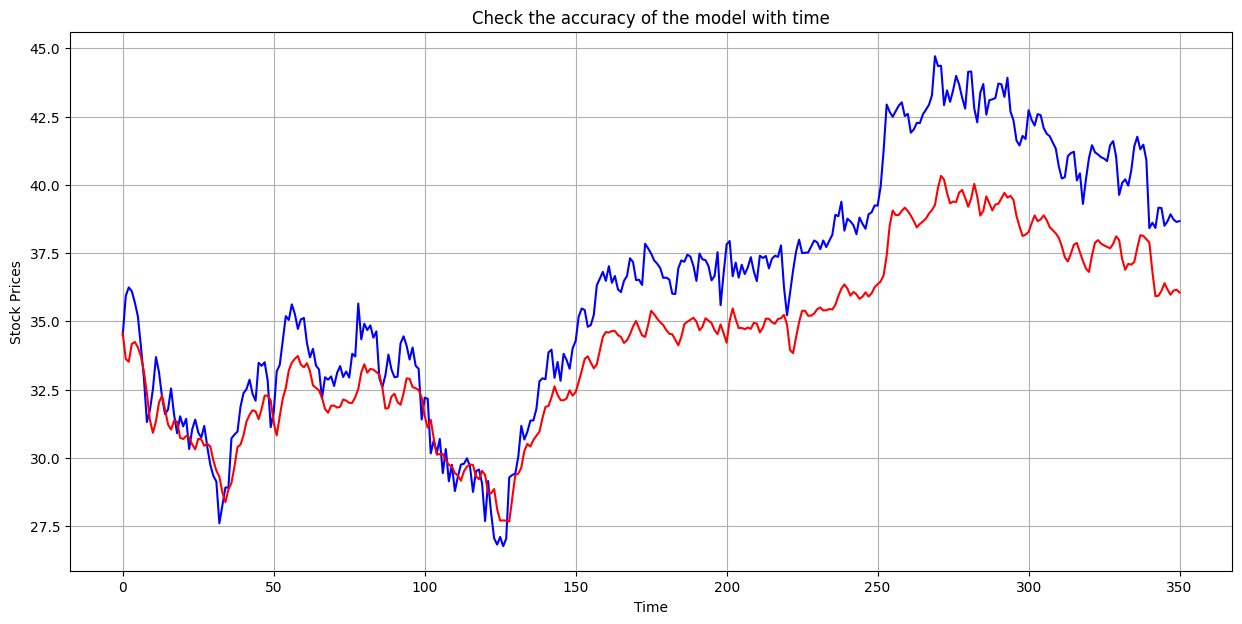

In [75]:
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(testY , 'b')
plt.plot(test_pred , 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices') 
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()

In [76]:
train_pred = model.predict(trainX)
train_pred = scaler.inverse_transform(train_pred)
trainY = trainY.reshape(trainY.shape[0] , 1)
trainY = scaler.inverse_transform(trainY)
print ('Display Accuracy Training Data')
display (r2_score(trainY,train_pred))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Display Accuracy Training Data


0.8933331182426263

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


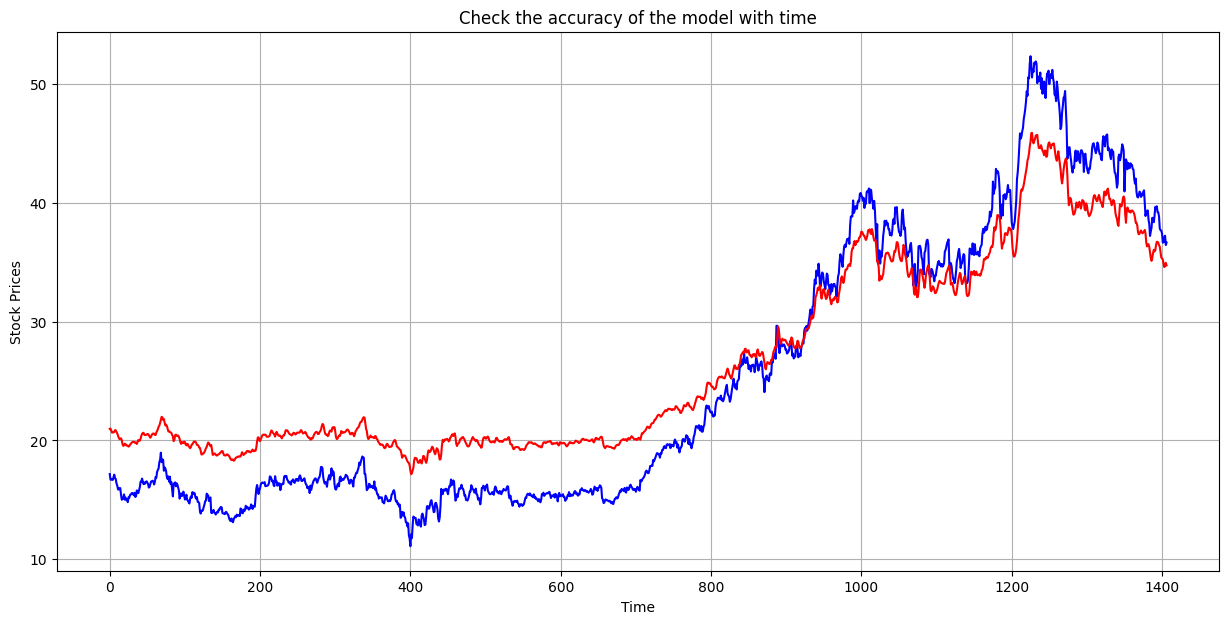

In [79]:
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(trainY  , 'b')
plt.plot(train_pred, 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()

In [78]:
stocks_pred = model.predict(stocksX)
stocks_pred = scaler.inverse_transform(stocks_pred)
stocksY = stocksY.reshape(stocksY.shape[0] , 1)
stocksY = scaler.inverse_transform(stocksY)
print ('Display Accuracy Training Data')
display (r2_score(stocksY,stocks_pred))

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Display Accuracy Training Data


0.9041923935134438

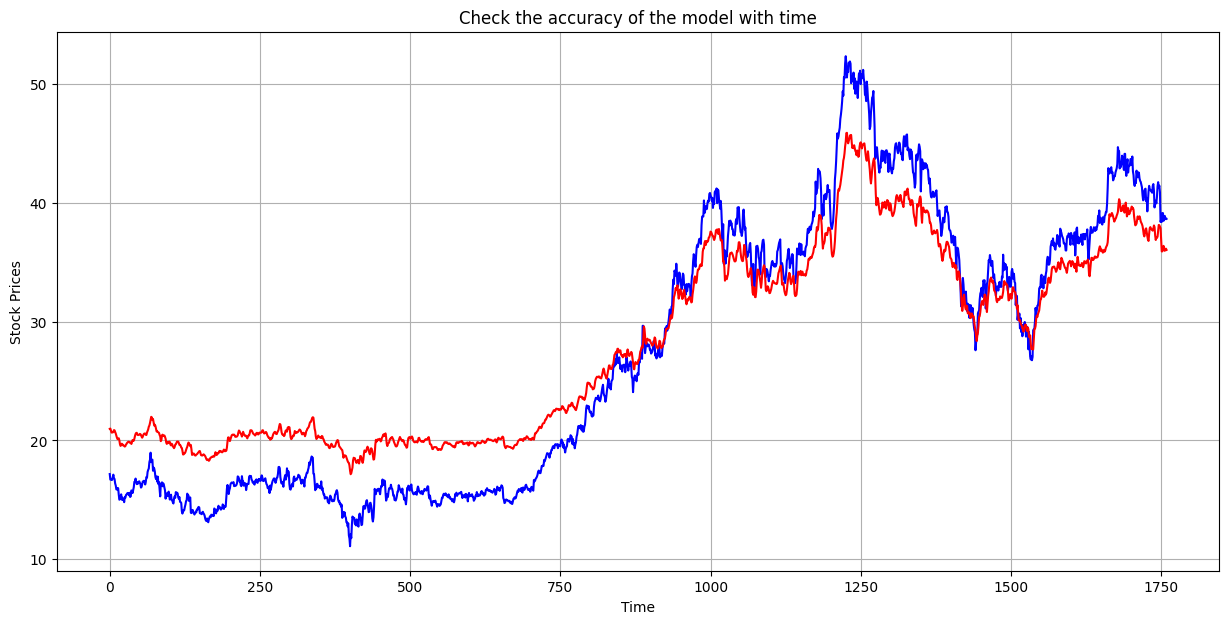

In [81]:
plt.rcParams['figure.figsize']=(15,7)
plt.plot(stocksY ,'b')
plt.plot(stocks_pred ,'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()

In [83]:
results= df[df.symbol.isin (['FB'])]
results= results [2:]
results = results.reset_index(drop=True)
df_stocks_pred= pd.DataFrame(stocks_pred, columns = ['Close_Prediction'])
results= pd.concat([results,df_stocks_pred],axis =1)
results.to_csv('results.csv')
display(results)

,date,symbol,open,close,low,high,volume,Close_Prediction
0,2013-01-04,FB,28.010000,28.760000,27.830000,28.930000,72715400.0,20.976763
1,2013-01-07,FB,28.690001,29.420000,28.650000,29.790001,83781800.0,21.004236
2,2013-01-08,FB,29.510000,29.059999,28.860001,29.600000,45871300.0,20.833593
3,2013-01-09,FB,29.670000,30.590000,29.490000,30.600000,104787700.0,20.665611
4,2013-01-10,FB,30.600000,31.299999,30.280001,31.450001,95316400.0,20.678289
...,...,...,...,...,...,...,...,...
1755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.169014
1756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.973545
1757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.123299
1758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.158714
